# Glass Identification Dataset - Practise Project 6

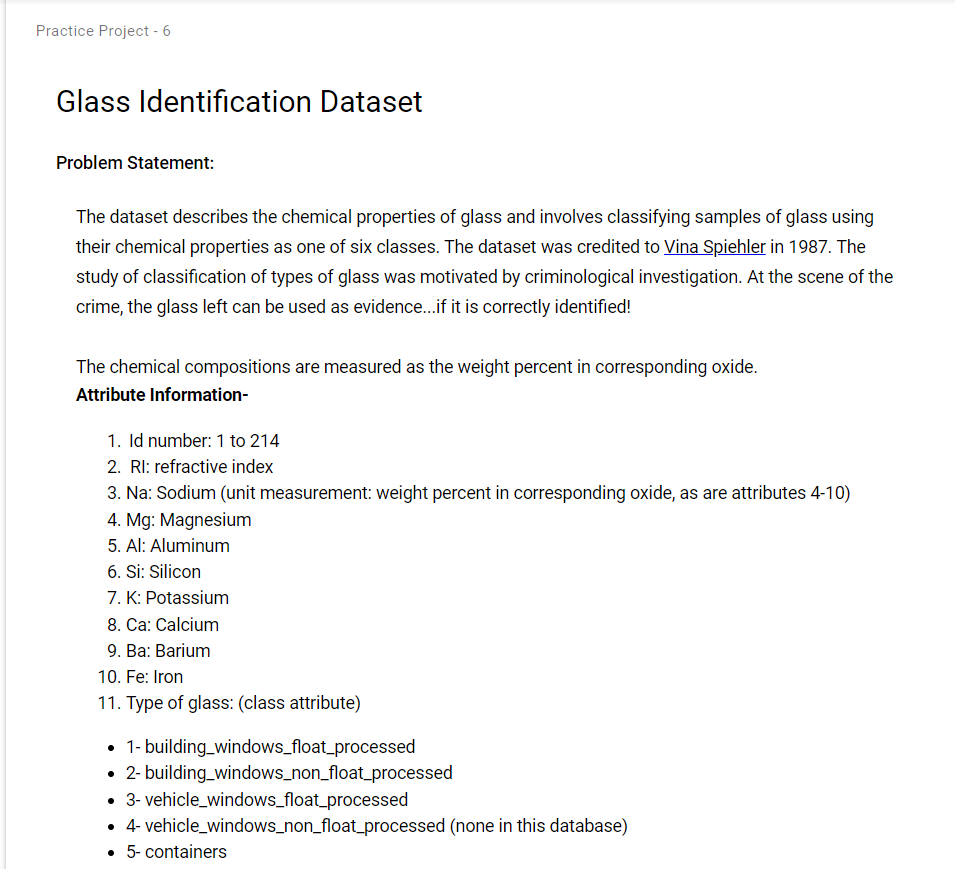

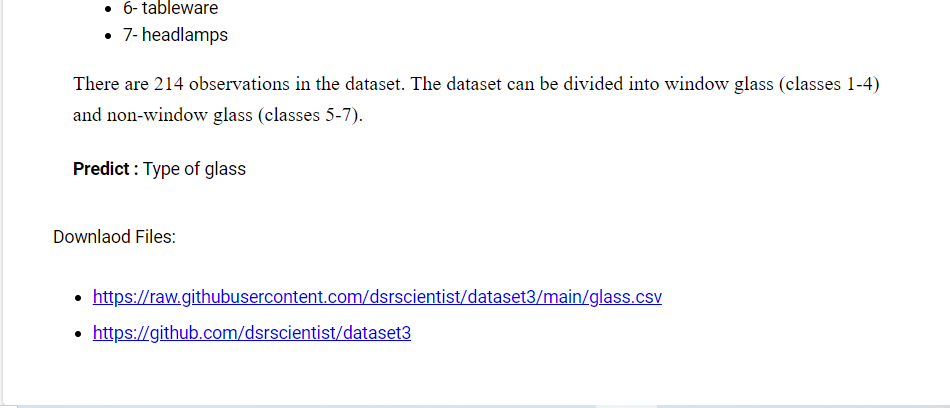

# Importing the Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
column_names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass' ] 
df = pd.read_csv("glass_prediction.csv", names = column_names) #reading the data file
df # shows 1st 5 and last 5 as well as the no of rows and columns 

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.shape #The Total number of data (same as df)

(214, 11)

In [4]:
df.columns #to see the columns names

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [5]:
df.head() #to see 5 first row of dataset

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df['Type of glass'].value_counts() # to see the split up of data in target variable 

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

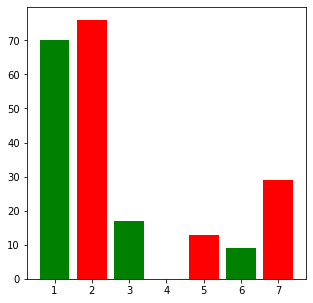

In [7]:
#Lets plot a graph to see the value counts in target 

plt.figure(figsize=(5,5))
plt.bar(list(df['Type of glass'].value_counts().keys()),list(df['Type of glass'].value_counts()),color=['r','g'])
plt.show()


We see that as per the target variable i.e Type of glass there are 70 in type 1 and 76 in type 2 which make up more than half of the other types of data, 

We also see that from the problem statement , most of the records on this dataset consist of building glass as in windows , etc... 

So in case we are converting the values based on type from multi classification to binary(0 and 1) we will need to balance the dataset other the model will be biased . 

### Plotting graph for Independent variables to see the nature of the values

<AxesSubplot:xlabel='RI', ylabel='Density'>

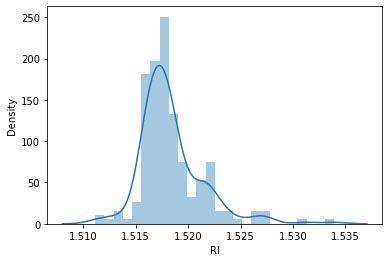

In [8]:
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


sns.distplot(df['RI'],kde=True)

We see that the data is normally distributed and the median is 1.517 appox , there is some skewness , very minimal , can be treated with zscore 

<AxesSubplot:xlabel='Na', ylabel='Density'>

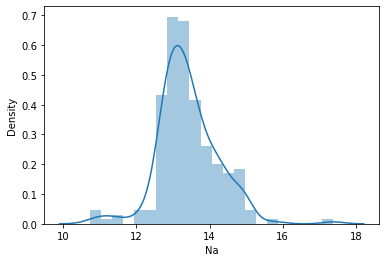

In [9]:
sns.distplot(df['Na'],kde=True)

For the feature Na sodium , the graph shows normal distribution as well 

<AxesSubplot:xlabel='Mg', ylabel='Density'>

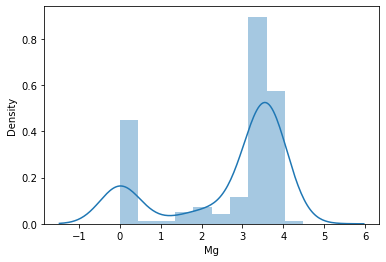

In [10]:
sns.distplot(df['Mg'],kde=True)

In the Mg column we see some null or 0 values, as well as very high percentage of data in the 3-4 range, we will need to check for skewness as well as treat the nulls 

<AxesSubplot:xlabel='Al', ylabel='Density'>

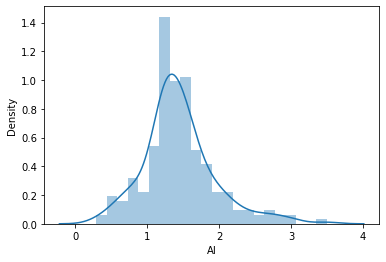

In [11]:
sns.distplot(df['Al'],kde=True)

Ai column shows normal distribution 

<AxesSubplot:xlabel='Si', ylabel='Density'>

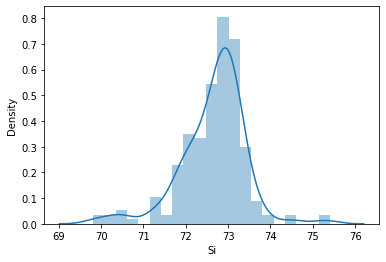

In [12]:
sns.distplot(df['Si'],kde=True)

Si column is normally distribution with slight skewness and some outliers , which we will see more in the coming steps

<AxesSubplot:xlabel='K', ylabel='Density'>

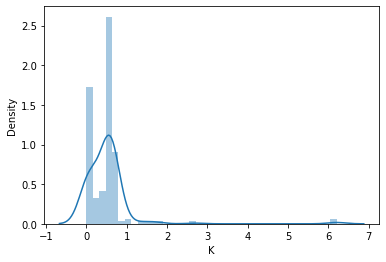

In [13]:
sns.distplot(df['K'],kde=True)

K has a lot of 0 values and the graph is a combination of 0 to 1 range at the max depth , has some outliers, which should be treated 

<AxesSubplot:xlabel='Ca', ylabel='Density'>

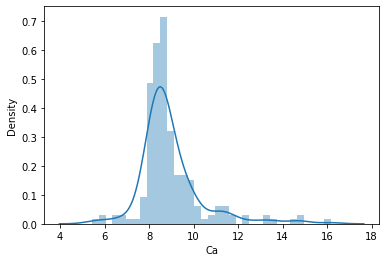

In [14]:
sns.distplot(df['Ca'],kde=True)

Ca shows normal distribution 

<AxesSubplot:xlabel='Ba', ylabel='Density'>

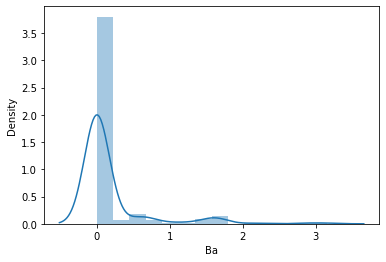

In [15]:
sns.distplot(df['Ba'],kde=True)

has a lot of values in 0 to 0.5 range which is max , may have null need to check 

<AxesSubplot:xlabel='Fe', ylabel='Density'>

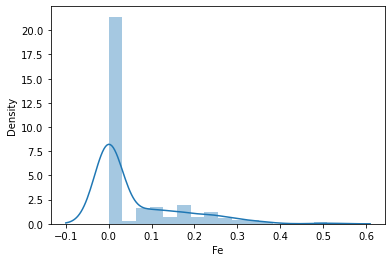

In [16]:
sns.distplot(df['Fe'],kde=True)

 Fe column has a lot of values in 0 to 0.5 range which is max , may have null need to check 

# Checking for NULL values if any in the data frame

np.nan, None, NaN and others..

In [17]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [18]:
#CAN ALSO USE

print (df.info()) #to check for null Values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None


 we do not see any null values in any of the columns which is a good sign , the earlier observations made were showing values which are closer to 0 but not equal to, so we can assume that there is no missing values in the dataset

In [19]:
df['Type of glass'].unique() # this is nominal data 

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [20]:
#We are creating a Classification model , so we will try to make the target variable into binary classification

#df['Type of glass'] = ((df['Type of glass']>5).astype(int)) #tried bool control function to seperate did not work as intended so using other functions 
df['Type of glass'] = np.where(df['Type of glass'] < 5, 1, df['Type of glass'] )

df.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [21]:
df['Type of glass'] = np.where(df['Type of glass'] != 1, 0,  df['Type of glass']) # we are converting values not as 1 to 0 

In [22]:
#Total no. of unique values in Target Variable
df['Type of glass'].nunique()

2

In [23]:
df['Type of glass'].value_counts() # to see the split up of data in target variable 

1    163
0     51
Name: Type of glass, dtype: int64

In [24]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,0


We have successfully transformed the values from 1 to 4 to 1 and 5 to 7 to 0 , but the values are imbalanced , so we will need to do resampling 

# Check the datatypes of the columns 

In [25]:
df.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [26]:
# Checking to see if any of the values in Charges is blank spaces

df.loc[df['Type of glass'] == " "]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass


We see no missing values or white spaces in the target column 

## Feature Engineering , treating Skewness as well as outliers if any 

In [27]:
df.skew().sort_values()

Type of glass   -1.237086
Mg              -1.152559
Si              -0.730447
Id               0.000000
Na               0.454181
Al               0.907290
RI               1.625431
Fe               1.754327
Ca               2.047054
Ba               3.416425
K                6.551648
dtype: float64

We see that there is there is skewness in Mg, Fe as well as Ba columns, as the value eexceeds +/- 0.5 , so we will plot the graph and used tranformation method to reduce it  

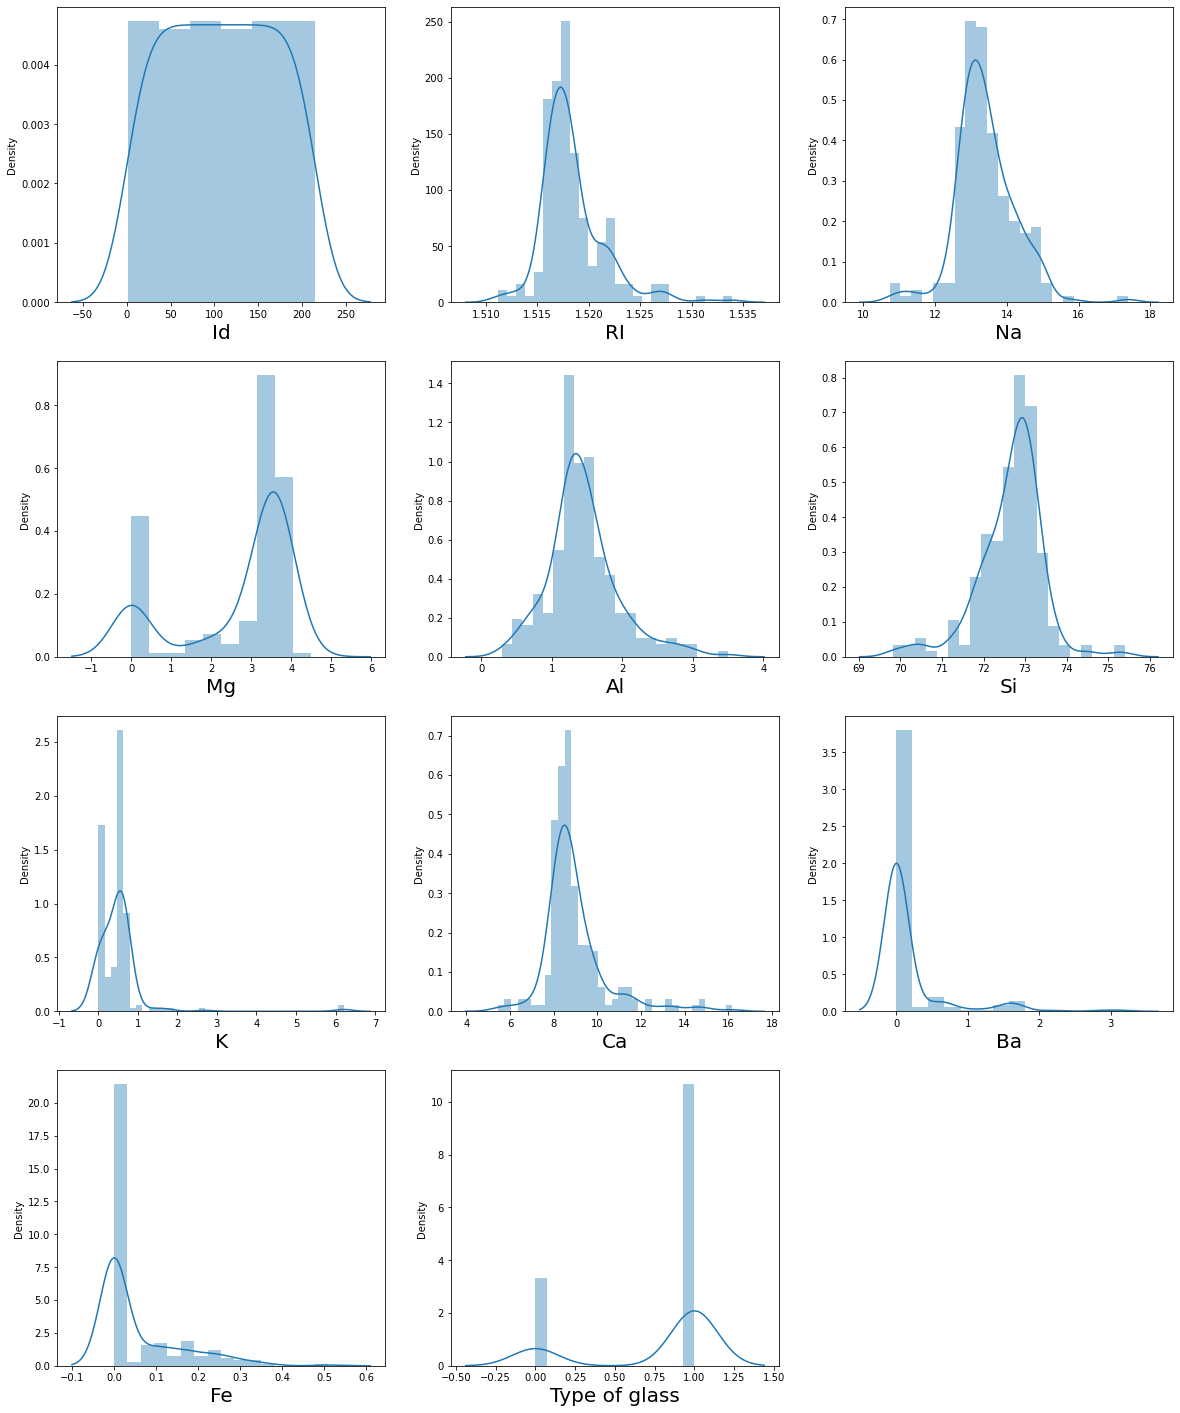

In [28]:
#Lets plot a graph to see the distribution of independent  variables 

plt.figure(figsize =(20,25),facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

As mention above we see imbalance in Mg, k, Ba, Fe , we see that the majority of the values fall in one range or value , so we need to treat them , and we are going to use Power transformer to do so..

# Power tranformer method to remove variance 

In [29]:
from sklearn.preprocessing import PowerTransformer
scaler =PowerTransformer(method = 'yeo-johnson') # we use as we have both positive & negative values 
'''

parameters:
method ='box-cox' or 'yeo-johnson'

'''

"\n\nparameters:\nmethod ='box-cox' or 'yeo-johnson'\n\n"

In [30]:
features = ['RI', 'Na', 'Mg', 'Al','Si','K','Ca','Ba','Fe']

In [31]:
df[features] = scaler.fit_transform(df[features].values)

In [32]:
df[features]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.454890,-0.680015
1,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.454890,-0.680015
2,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.454890,-0.680015
3,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.454890,-0.680015
4,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.454890,-0.680015
...,...,...,...,...,...,...,...,...,...
209,-5.551115e-17,0.910183,-1.739289,2.417218,-0.115117,-1.187926,0.334634,2.371029,-0.680015
210,-4.163336e-17,1.790505,-1.739289,1.109283,0.498613,-1.619585,-0.319385,2.376703,-0.680015
211,6.591949e-17,1.163835,-1.739289,1.159377,1.021794,-1.619585,-0.282733,2.376848,-0.680015
212,-4.857226e-17,1.186681,-1.739289,1.024669,1.310019,-1.619585,-0.246446,2.376638,-0.680015


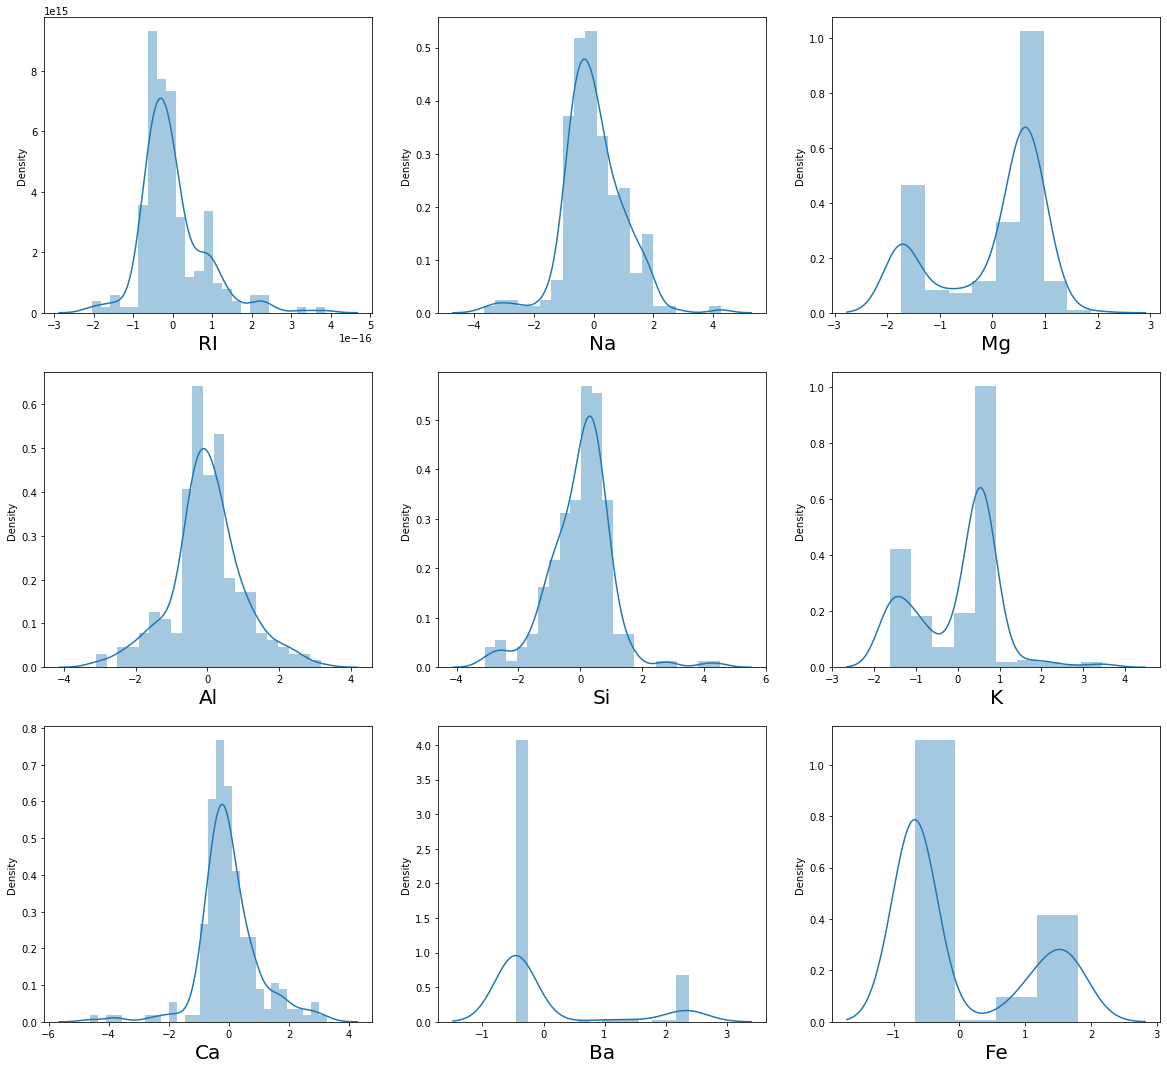

In [33]:
#Lets plot a graph to see the distribution of independent  variables 

plt.figure(figsize =(20,25),facecolor = 'white')
plotnumber = 1

for column in df[features]:
    if plotnumber <=11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

# EDA

In [34]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,214.000000
mean,107.500000,-1.296990e-19,-4.586155e-16,2.843001e-16,-6.401940e-16,-1.795033e-16,-4.357885e-17,6.085475e-15,-1.508658e-15,2.801497e-17,0.761682
std,61.920648,8.059522e-17,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,0.427053
min,1.000000,-2.046974e-16,-3.691602e+00,-1.739289e+00,-3.103083e+00,-3.085730e+00,-1.619585e+00,-4.620109e+00,-4.548895e-01,-6.800149e-01,0.000000
25%,54.250000,-4.857226e-17,-5.967242e-01,-7.800551e-01,-4.522909e-01,-5.382779e-01,-9.835164e-01,-4.697395e-01,-4.548895e-01,-6.800149e-01,1.000000
50%,107.500000,-1.734723e-17,-1.001681e-01,5.252449e-01,-7.749848e-02,1.251689e-01,4.658823e-01,-1.397191e-01,-4.548895e-01,-6.800149e-01,1.000000
75%,160.750000,2.428613e-17,5.392764e-01,6.681632e-01,4.657070e-01,5.375475e-01,5.948186e-01,3.288902e-01,-4.548895e-01,1.190132e+00,1.000000
max,214.000000,3.851086e-16,4.263290e+00,1.876273e+00,3.161825e+00,4.504996e+00,3.452443e+00,3.247215e+00,2.377662e+00,1.795923e+00,1.000000


From the Df describe we see that the mean and Std of all the columns are fairly good ,

We also see the min and max values, In that also we see that after using power tranformation the values are within the normal variance level

We see that for Fe , all the values are within a very certain range we see values -6.800149e-01 as the norm for 25% till 75% which means the set has similar values for most of the rows.

Like the Fe , we see that Ca is also very much similar , having same values for the most part of the rows   


<AxesSubplot:>

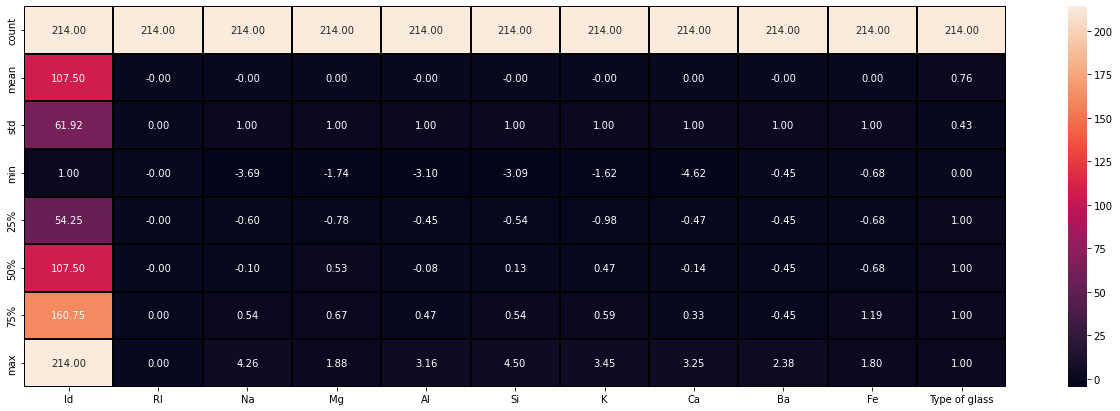

In [35]:
#lets plot a heat map and show the same data

import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

We see most of the values lie in o to 25 range which means there is no highly variance in all the columns 

# Correlation of the columns with the target Columns

In [36]:
df.corr()['Type of glass'].sort_values()

Id              -0.737956
Ba              -0.602315
Al              -0.537422
Na              -0.431712
Si              -0.186652
Ca               0.005991
RI               0.134920
Fe               0.234408
K                0.294218
Mg               0.772264
Type of glass    1.000000
Name: Type of glass, dtype: float64

We see that Mg has a very strong positive Relationship with the target variable so we can assume that the contribution of this column will be the max, we see that Ba has the highest neative correlation with the target variable  

# Correlation between the columns to check for multicollinearity 

<AxesSubplot:>

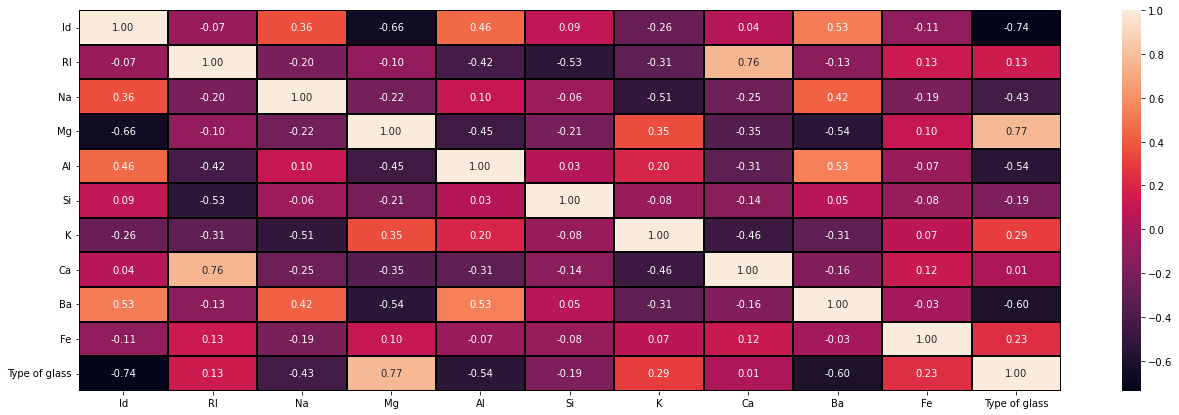

In [37]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

We see that the max relation between feature and feature is Ri and Ca which is 0.77 which is the highest, Ai and Ba is the 2nd highest at 0.53 but we will not remove any columns as the value is not significant enought o pose multicollinearity  

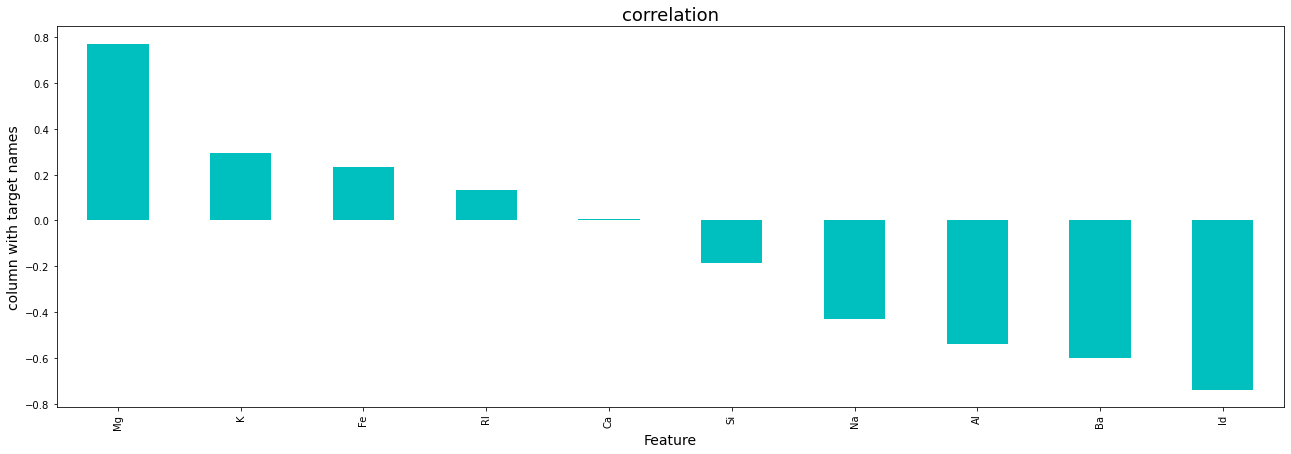

In [38]:
#plotting a BAr plot to show the correlation in a different way

plt.figure(figsize=(22,7))
df.corr()['Type of glass'].sort_values(ascending=False).drop(['Type of glass']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Variance Inflation Factor

Checking for Multicollinearity problem to see if one feature is dependent on the other , we need to scale the dat first using MINMAX Scalar

In [39]:
vif_x = df.drop(columns = ['Type of glass'])
vif_y = df['Type of glass']

In [40]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [41]:
X_scaled = mms.fit_transform(vif_x) #data already scaled so we can use the orignal dat as well 

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(vif_x, i) for i in range(vif_x.shape[1])]
vif["Features"] = vif_x.columns

#chck Values
vif

,vif,Features
0,1.148200,Id
1,6.360832,RI
2,3.291095,Na
3,3.958359,Mg
4,2.387119,Al
5,1.636828,Si
6,4.015415,K
7,5.413070,Ca
8,2.622561,Ba
9,1.092057,Fe


We see that RI and CA showing higher than 5 vif score , but we shall move on for now as we are still yet tot treat oulliers , so we will check after that if its the same , we may need to drop the columns as it will have multicollinearity problem

# Principal Component Analysis (PCA)

It is a dimension reduction technique and not a feature selection one.

and we are going to apply on the features only , it is mainly used if there are too many features and no correlation with the target

but its the final analysis we are going to do to chcek for multicollinearity problem

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA()

In [45]:
pca.fit_transform(vif_x) #To scale the data with PCA so we can plot the graph to see whats the coverage 

array([[-1.06506023e+02, -8.93696722e-01,  1.62176342e+00, ...,
        -1.04912727e+00,  9.80472920e-02, -3.90086515e-18],
       [-1.05492770e+02,  6.48620044e-01,  1.73350824e+00, ...,
         7.90518703e-02,  2.44124245e-02, -4.21958989e-18],
       [-1.04490500e+02,  7.32884648e-01,  1.64132237e+00, ...,
        -3.42773487e-01,  2.30436408e-01, -1.88819296e-18],
       ...,
       [ 1.04547979e+02, -2.42127958e-01,  1.93773687e+00, ...,
        -1.12265922e-01,  1.78267167e-01, -1.28219895e-17],
       [ 1.05547409e+02, -3.08162266e-01,  1.94081235e+00, ...,
        -5.11319911e-02,  9.83892149e-02, -4.50918440e-19],
       [ 1.06547523e+02, -2.94548333e-01,  1.77388582e+00, ...,
        -2.03572557e-01,  1.45411130e-01, -2.15399398e-19]])

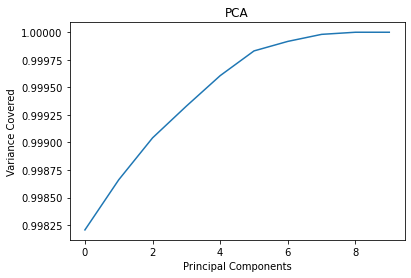

In [46]:
# lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

As per the graph it shows that we can use 6 features to cover  near to 100% of the data and we can skip using the other features, so we will first treat the outliers and then we wiil try to drop after chceking again 

# Outliers an Zscore conversion if needed 

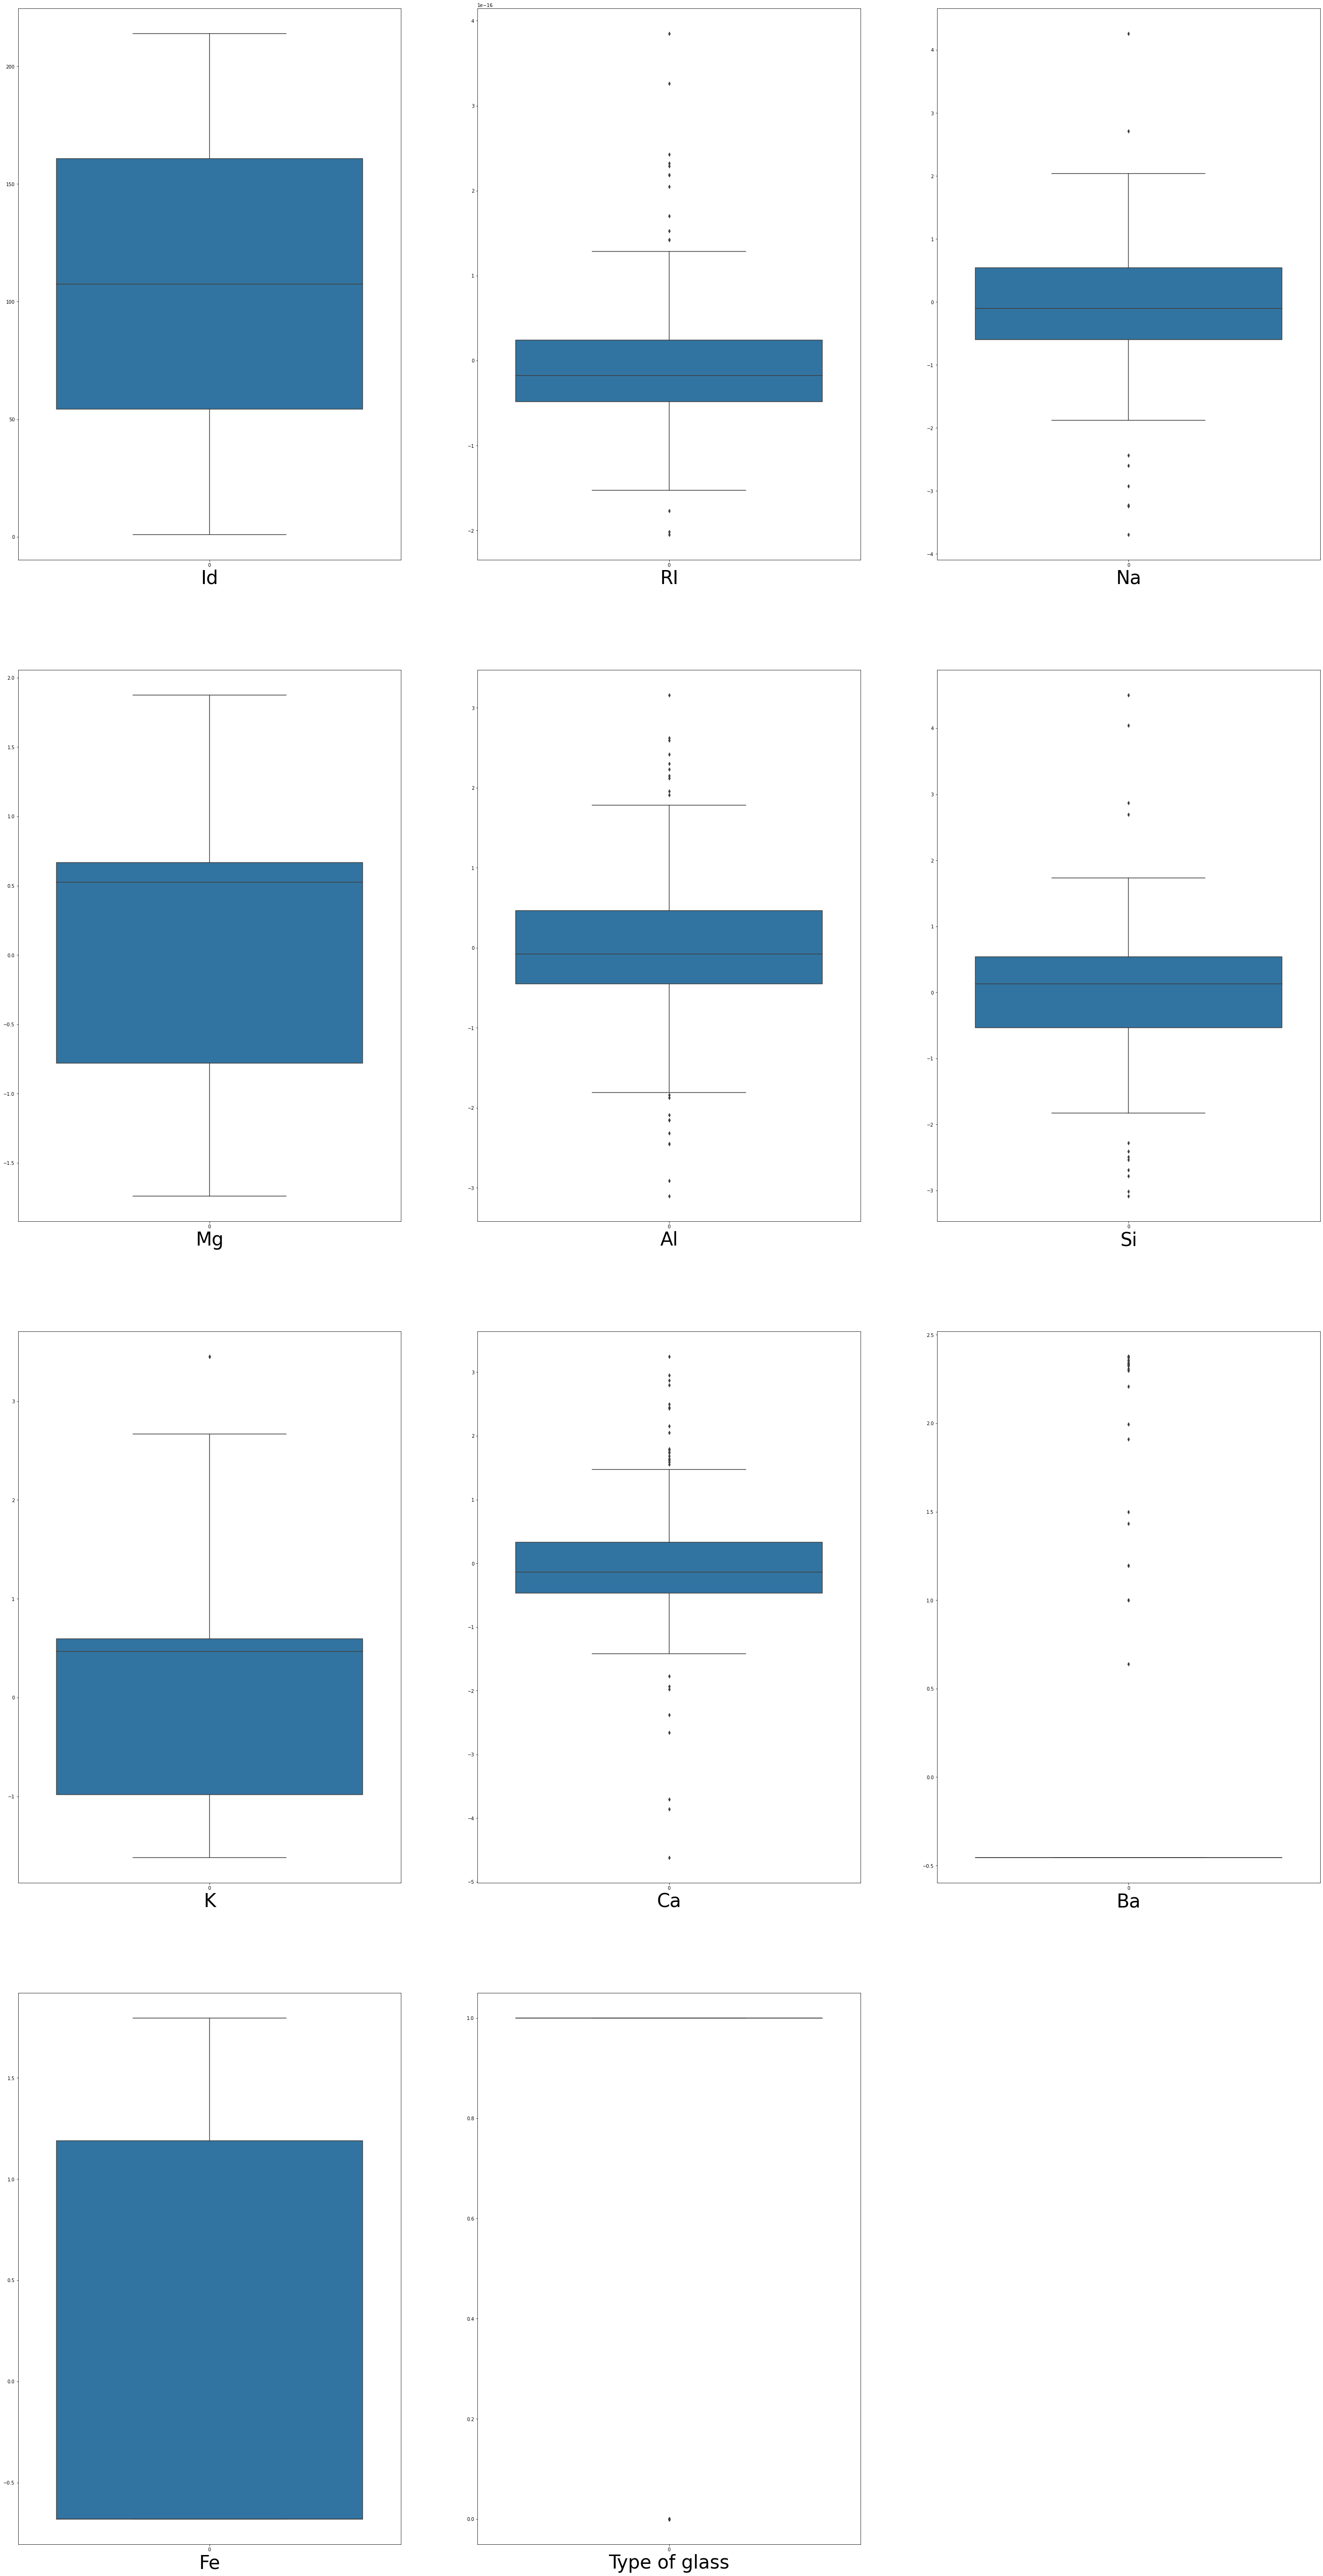

In [47]:
#Lets visualize the data
plt.figure(figsize =(50,100))
graph = 1

for column in df:
    if graph <=11: 
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 40)
        
    graph +=1
plt.show()

We do see many outliers in Ri, NA, Ai, Si,Ca, so we will try to remove them with Zscore and check again

<AxesSubplot:>

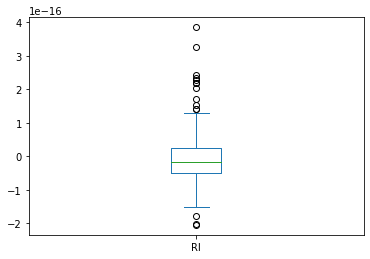

In [48]:
# LEts plot individually for Ri alone 

#As we are able to see clearly Ri has ouliers we zoom , checking individualy

df['RI'].plot.box()

<AxesSubplot:>

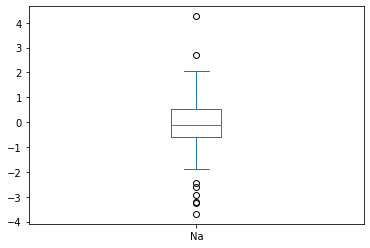

In [49]:
# LEts plot individually for Na alone 

#As we are able to see clearly NA has ouliers we zoom , checking individualy

df['Na'].plot.box()

<AxesSubplot:>

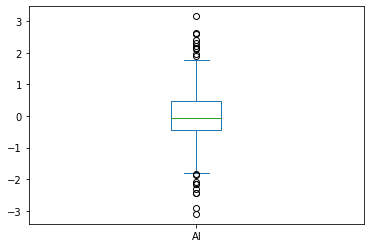

In [50]:
# LEts plot individually for Ai alone 

#As we are able to see clearly Ai has ouliers we zoom , checking individualy

df['Al'].plot.box()

<AxesSubplot:>

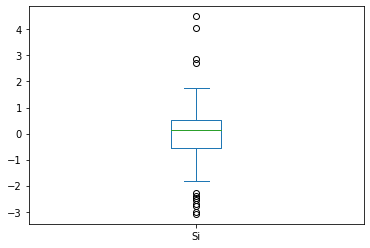

In [51]:
# LEts plot individually for Si alone 

#As we are able to see clearly Si has ouliers we zoom , checking individualy

df['Si'].plot.box()

<AxesSubplot:>

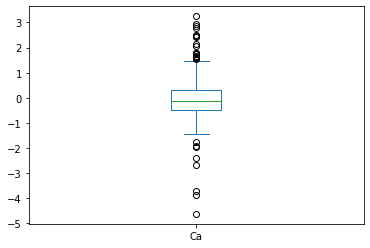

In [52]:
# LEts plot individually for Ca alone 

#As we are able to see clearly Ca has ouliers we zoom , checking individualy

df['Ca'].plot.box()

# Considering the outlier removal 

In [53]:
df.shape

(214, 11)

In [54]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 21, 106, 106, 106, 107, 107, 111, 112, 163, 163, 163, 166, 171,
        172, 184, 184, 185, 186, 201], dtype=int64),
 array([4, 1, 2, 5, 1, 7, 2, 1, 4, 5, 7, 2, 6, 6, 2, 5, 7, 7, 5],
       dtype=int64))

In [55]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.454890,-0.680015,1
1,2,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.454890,-0.680015,1
2,3,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.454890,-0.680015,1
3,4,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.454890,-0.680015,1
4,5,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.454890,-0.680015,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,-5.551115e-17,0.910183,-1.739289,2.417218,-0.115117,-1.187926,0.334634,2.371029,-0.680015,0
210,211,-4.163336e-17,1.790505,-1.739289,1.109283,0.498613,-1.619585,-0.319385,2.376703,-0.680015,0
211,212,6.591949e-17,1.163835,-1.739289,1.159377,1.021794,-1.619585,-0.282733,2.376848,-0.680015,0
212,213,-4.857226e-17,1.186681,-1.739289,1.024669,1.310019,-1.619585,-0.246446,2.376638,-0.680015,0


In [56]:
df_new_z.shape

(201, 11)

In [57]:
##Percentage of data loss:

Data_loss = ((214-210)/214)*100

In [58]:
Data_loss

1.8691588785046727

So we have less that 2% data loss so we will take the new data with lesser skewness

In [59]:
df_new_z.skew()

Id               0.066335
RI               0.000000
Na               0.209223
Mg              -1.037034
Al              -0.028366
Si              -0.302540
K               -0.732400
Ca               0.937498
Ba               1.918537
Fe               0.807903
Type of glass   -1.405708
dtype: float64

# Domain Knowledge about Glass and important things about the dataset:
    
    1. the most prominant components of glass is the RI and SI silicon which is the primary component 
    2. the othe components will may or may not be present as there components determine for what purpose the glass is being used 
    3. So we cannot remove any outliers as the dat will not be unifrom as some components may not be present in some type of glass while in some it will be very prominent
    4. So we will no do any more removal of outliers as we need the data to make the model understand the type of glass better 

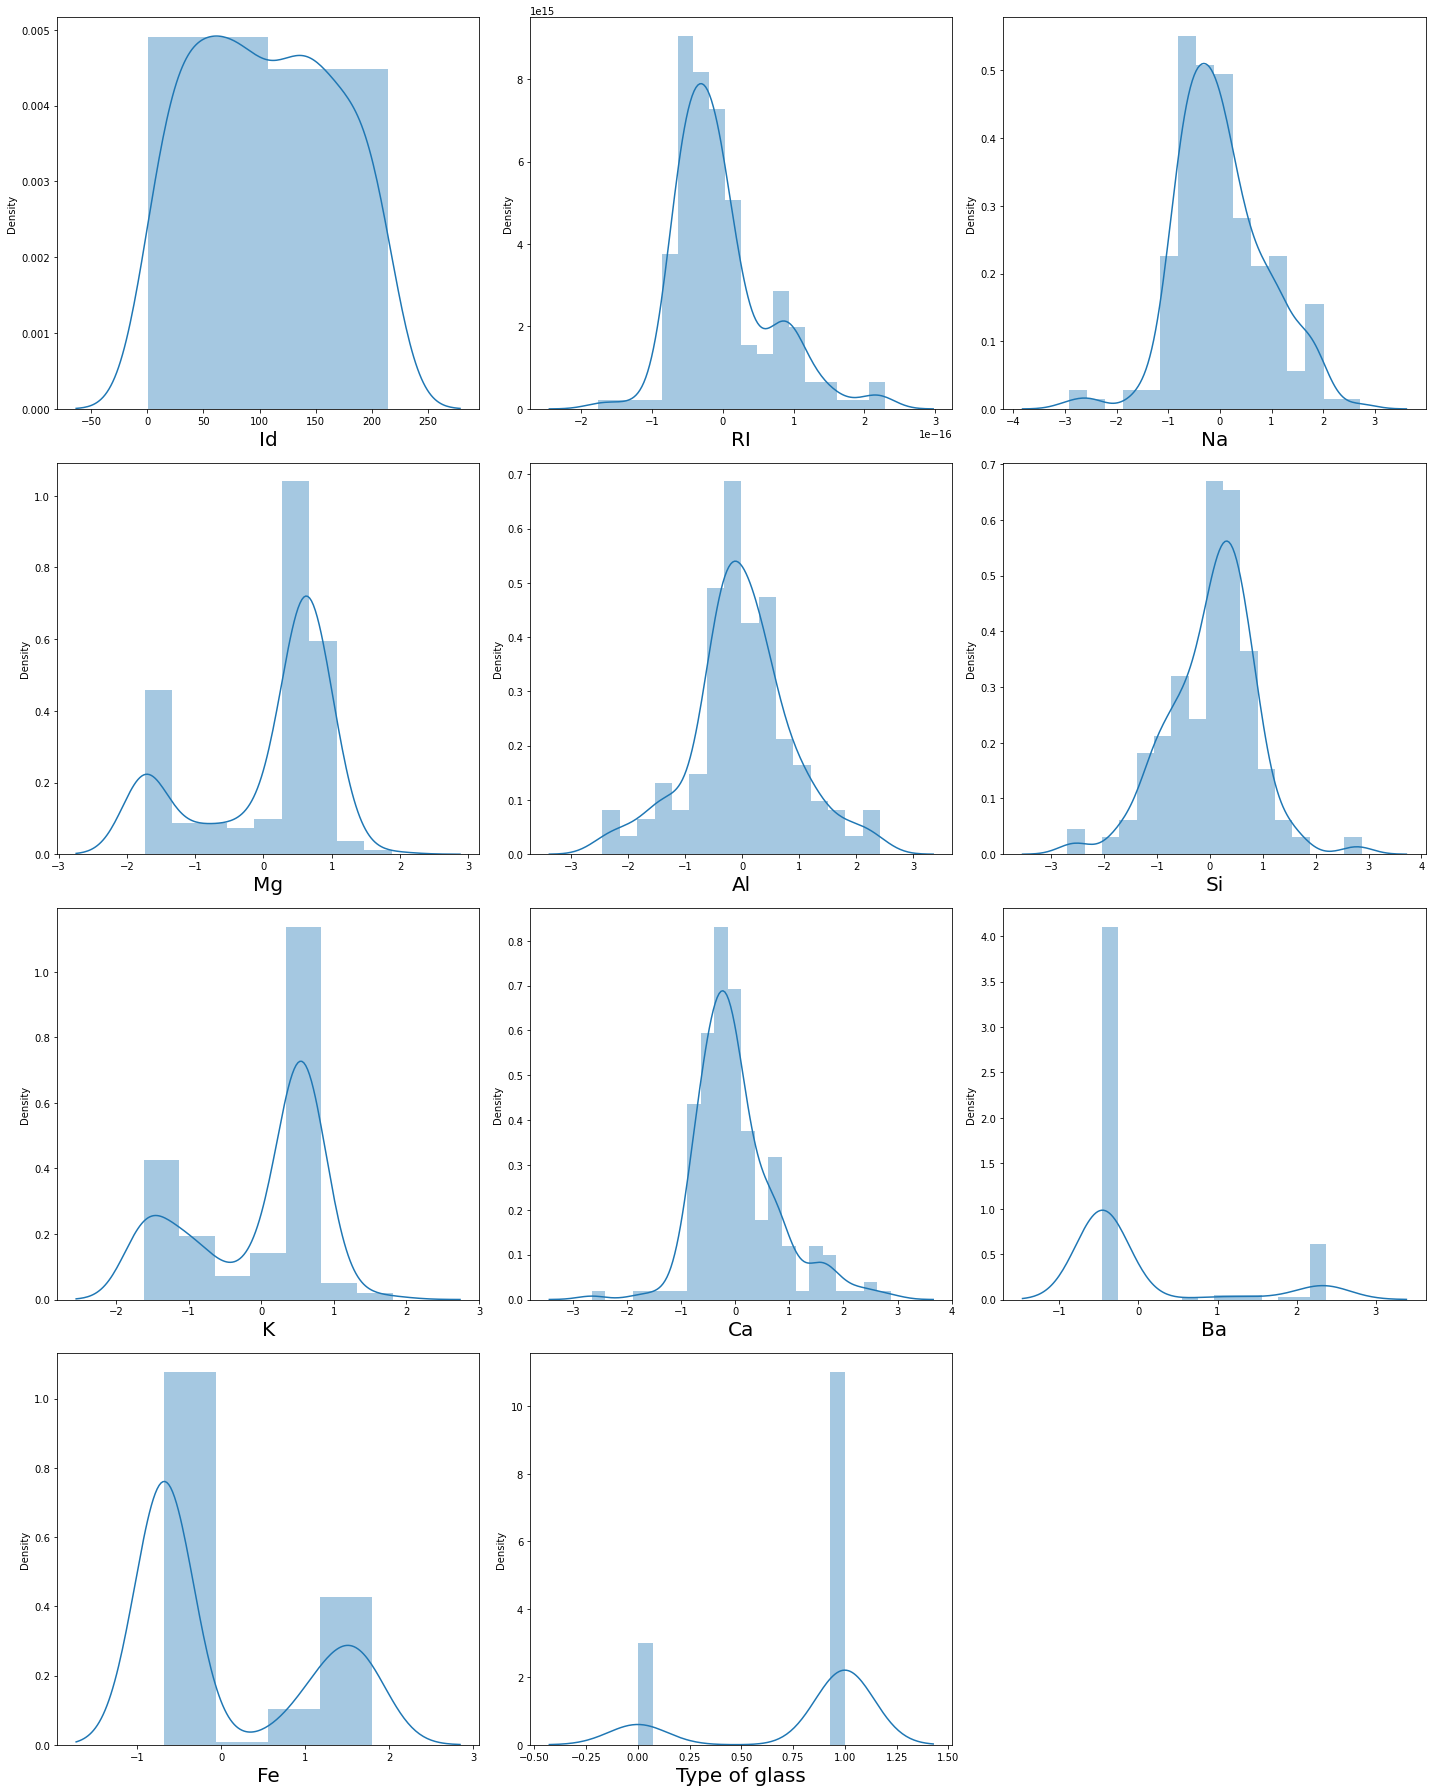

In [60]:
#Lets plot is though another time to see the graph

plt.figure(figsize =(20,25), facecolor = 'white')
plotnumber = 1

for column in df_new_z:
    if plotnumber <=11: 
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df_new_z[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

### We see overall good normally distributed data in the columns . So moving to next step 

# Balancing the Target variable 

## Splitting the data into train test split

In [61]:
#Counter module to count each class
from collections import Counter
Counter(df_new_z['Type of glass'])

Counter({1: 158, 0: 43})

In [62]:
X= df_new_z.drop('Type of glass',axis=1)
y = df_new_z['Type of glass']

In [63]:
X

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.454890,-0.680015
1,2,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.454890,-0.680015
2,3,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.454890,-0.680015
3,4,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.454890,-0.680015
4,5,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.454890,-0.680015
...,...,...,...,...,...,...,...,...,...,...
209,210,-5.551115e-17,0.910183,-1.739289,2.417218,-0.115117,-1.187926,0.334634,2.371029,-0.680015
210,211,-4.163336e-17,1.790505,-1.739289,1.109283,0.498613,-1.619585,-0.319385,2.376703,-0.680015
211,212,6.591949e-17,1.163835,-1.739289,1.159377,1.021794,-1.619585,-0.282733,2.376848,-0.680015
212,213,-4.857226e-17,1.186681,-1.739289,1.024669,1.310019,-1.619585,-0.246446,2.376638,-0.680015


In [64]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    0
210    0
211    0
212    0
213    0
Name: Type of glass, Length: 201, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75,random_state = 322)

In [66]:
Counter(y_train)

Counter({1: 120, 0: 30})

## Over Sampling using SMOTE

In [82]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

ove_smp = SMOTE(0.75)

X_train_ns,y_train_ns= ove_smp.fit_resample(X_train,y_train) # using resample as the sample did not work

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 120, 0: 30})
The number of classes after fit Counter({1: 120, 0: 90})


In [83]:
y_train_ns.value_counts()

1    120
0     90
Name: Type of glass, dtype: int64

We see that there are many people in 3 P class and S Embarked and the rest of the classes in that feature are very low ut as they are categorical in nature we will not treat them , 

We also see the target variable is balanced with 0 and 1 i.e Survived and not survived

In [84]:
# compare Type of Glass rate across 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'
pd.pivot_table(df, index = 'Type of glass', values = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])

,Al,Ba,Ca,Fe,K,Mg,Na,RI,Si
Type of glass,,,,,,,,,
0,0.960780,1.076793,-0.010711,-0.419065,-0.525991,-1.380621,0.771797,-1.952414e-17,0.333688
1,-0.300612,-0.336911,0.003351,0.131118,0.164574,0.431973,-0.241482,5.938501e-18,-0.104406


## We see the following observations fron the table :-

1. Ba is biased towards type 0 window glass
2. Mg is biased towards type 1 glass non window glass
3. RI is also stating that the higer the RI the glass is non window and not window glass
4. Al is biased towards windows glass or Type 0 glass

- 

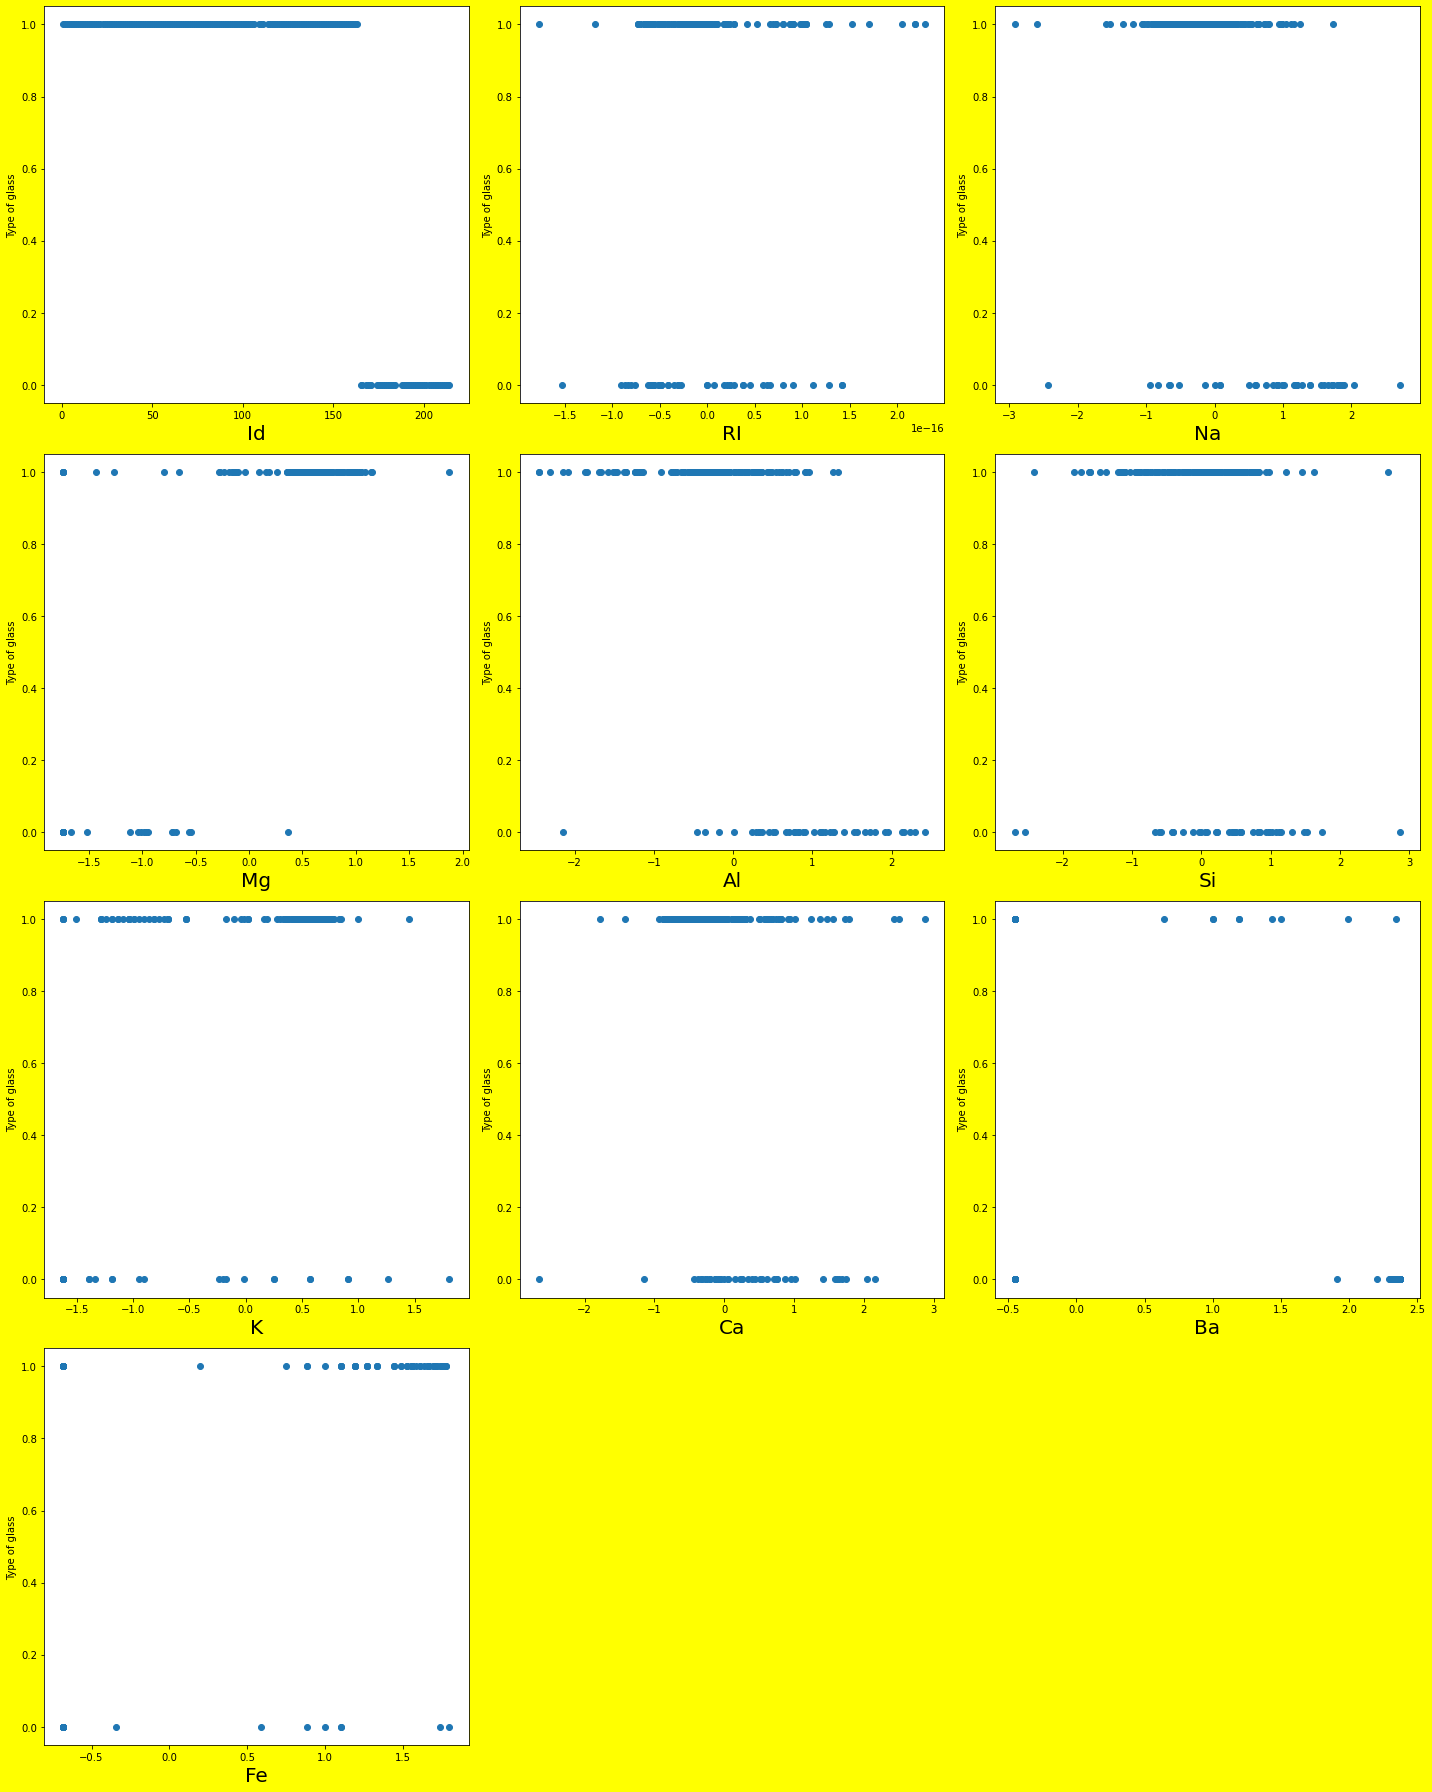

In [70]:
#Visualizing Relationship with Scatter plot 

plt.figure(figsize =(20,25), facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <=11:
        ax = plt.subplot(4,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Type of glass',fontsize = 10)
    plotnumber +=1
plt.tight_layout()



We see that there is some relationship with target and 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'

In [71]:
df_new_z

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.454890,-0.680015,1
1,2,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.454890,-0.680015,1
2,3,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.454890,-0.680015,1
3,4,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.454890,-0.680015,1
4,5,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.454890,-0.680015,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,-5.551115e-17,0.910183,-1.739289,2.417218,-0.115117,-1.187926,0.334634,2.371029,-0.680015,0
210,211,-4.163336e-17,1.790505,-1.739289,1.109283,0.498613,-1.619585,-0.319385,2.376703,-0.680015,0
211,212,6.591949e-17,1.163835,-1.739289,1.159377,1.021794,-1.619585,-0.282733,2.376848,-0.680015,0
212,213,-4.857226e-17,1.186681,-1.739289,1.024669,1.310019,-1.619585,-0.246446,2.376638,-0.680015,0


### Since we have already scaled the data now we will go ahead with model building 

# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

In [86]:
for i in range(0,100):
    X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = i)
    lr.fit(X_train_ns,y_train)
    pred_train = lr.predict(X_train_ns)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
    print(f"At random state {i},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
    print('\n')

At random state 0,the training accuracy is :-0.78
At random state 0,the Testing accuracy is :-0.7647058823529411


At random state 1,the training accuracy is :-0.7866666666666666
At random state 1,the Testing accuracy is :-0.7843137254901961


At random state 2,the training accuracy is :-0.8
At random state 2,the Testing accuracy is :-0.7843137254901961


At random state 3,the training accuracy is :-0.7666666666666667
At random state 3,the Testing accuracy is :-0.8235294117647058


At random state 4,the training accuracy is :-0.8
At random state 4,the Testing accuracy is :-0.7058823529411765


At random state 5,the training accuracy is :-0.7866666666666666
At random state 5,the Testing accuracy is :-0.7843137254901961


At random state 6,the training accuracy is :-0.7733333333333333
At random state 6,the Testing accuracy is :-0.8431372549019608


At random state 7,the training accuracy is :-0.7733333333333333
At random state 7,the Testing accuracy is :-0.8235294117647058


At random st

At random state 67,the training accuracy is :-0.7866666666666666
At random state 67,the Testing accuracy is :-0.7843137254901961


At random state 68,the training accuracy is :-0.7733333333333333
At random state 68,the Testing accuracy is :-0.8235294117647058


At random state 69,the training accuracy is :-0.7866666666666666
At random state 69,the Testing accuracy is :-0.7843137254901961


At random state 70,the training accuracy is :-0.7666666666666667
At random state 70,the Testing accuracy is :-0.803921568627451


At random state 71,the training accuracy is :-0.8066666666666666
At random state 71,the Testing accuracy is :-0.7254901960784313


At random state 72,the training accuracy is :-0.8066666666666666
At random state 72,the Testing accuracy is :-0.7254901960784313


At random state 73,the training accuracy is :-0.7866666666666666
At random state 73,the Testing accuracy is :-0.7843137254901961


At random state 74,the training accuracy is :-0.8
At random state 74,the Testing acc

We see that the random state 95 is giving us the best testing accuracy of 90% approx the training accuracy is lees though at 75.33% ,

- We see that a better state in terms of difference between train and test accuracy is 77,85 state as they are both 80% with minimal difference

- we see that for this model to perform better we need to increase wtih hyperparameter tuning but we will test other models before we do that. 


# Train Test Split

In [77]:
X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.20,random_state = 95) 

# as the best random state we have chosen is 85 

# Model Selection 

### We are creating a method called Metric to allow us to show the metrics of each classification model we use , so we dont have to code it again 

In [87]:
#Write one function and call as many times to check accuracy_score of different models

def metric_score(clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        
        print("\n===============================Train Result=============================")
        
        print(f"Accuracy score : {accuracy_score(y_train_ns,y_pred) * 100: .2f}%")
        
    elif train == False:
        pred = clf.predict(X_test)
        
        print("\n===============================Test Result===============================")
        print(f"Accuracy Scorre : {accuracy_score(y_test,pred) * 100: .2f}%")
        
        
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) ##Model Confidence /Accurancy
        

In [88]:
#Call the function and pass dataset to check the train score and the test score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  78.00%

===============================Test Result===============================
Accuracy Scorre :  82.35%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.82      1.00      0.90        42

    accuracy                           0.82        51
   macro avg       0.41      0.50      0.45        51
weighted avg       0.68      0.82      0.74        51



We are able to get score of 78% approx in train accuracy and 82.35%, 

Precision score for not 0 is 0% which is very bad , so this model is not working for this dataset but for 1 its 82% for survived

# Cross-Validation of the model

In [91]:

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

At cross fold2 the cv score is 0.7455445544554455 and accuracy score for training is 0.78and the accuracy for testing is 0.8235294117647058


At cross fold3 the cv score is 0.8557213930348259 and accuracy score for training is 0.78and the accuracy for testing is 0.8235294117647058


At cross fold4 the cv score is 0.8804901960784314 and accuracy score for training is 0.78and the accuracy for testing is 0.8235294117647058


At cross fold5 the cv score is 0.9104878048780488 and accuracy score for training is 0.78and the accuracy for testing is 0.8235294117647058


At cross fold6 the cv score is 0.9246880570409983 and accuracy score for training is 0.78and the accuracy for testing is 0.8235294117647058


At cross fold7 the cv score is 0.9442294159042929 and accuracy score for training is 0.78and the accuracy for testing is 0.8235294117647058


At cross fold8 the cv score is 0.9901923076923077 and accuracy score for training is 0.78and the accuracy for testing is 0.8235294117647058


At cro

We see that the cross val scoree is becoming overfitted in ranges higher than 3 , so the cv3 is the only model which is relatively good but still we feel this model may not work well with this dataset so we try other models 

# Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = 95) #as we have seen a good score on 95th state
dt.fit(X_train_ns,y_train_ns)
pred_train = dt.predict(X_train_ns)
pred_test = dt.predict(X_test)
print(f"At random state {95},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
print(f"At random state {95},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
print('\n')


At random state 95,the training accuracy is :-1.0
At random state 95,the Testing accuracy is :-1.0




In [93]:
#Call the function and pass dataset to check the train score and the test score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  100.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        45

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



We see the following observations in the scores above:-

- both the train and test score are 100% and the train score is alos 100%
- this model is  doing well with this dataset as the test score is 100%  than Logistic regression 90%
- precision score is also higher as compared to  logistic regression

In [95]:
print(confusion_matrix(y_test,pred_test)) 

[[ 6  0]
 [ 0 45]]


### we are showing the confusin matrix as well to show type 1 and type 2 error which is 0 and 0 which is a higher than logistic regression and we feel this model is  the best with this dataset among the 2

In [96]:
#Cross validation of the model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dt,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

At cross fold2 the cv score is 0.695990099009901 and accuracy score for training is 1.0and the accuracy for testing is 1.0


At cross fold3 the cv score is 0.8407960199004975 and accuracy score for training is 1.0and the accuracy for testing is 1.0


At cross fold4 the cv score is 0.8755882352941177 and accuracy score for training is 1.0and the accuracy for testing is 1.0


At cross fold5 the cv score is 0.900609756097561 and accuracy score for training is 1.0and the accuracy for testing is 1.0


At cross fold6 the cv score is 0.9197860962566846 and accuracy score for training is 1.0and the accuracy for testing is 1.0


At cross fold7 the cv score is 0.934201266713582 and accuracy score for training is 1.0and the accuracy for testing is 1.0


At cross fold8 the cv score is 0.9405769230769231 and accuracy score for training is 1.0and the accuracy for testing is 1.0


At cross fold9 the cv score is 0.9499341238471674 and accuracy score for training is 1.0and the accuracy for testing is 1

We see that the cross val score @ fold 9 is  94.9 % which is the closest to the accuracy , which is still not ideal , but we will try other model to see if this is issue with model or dataset

# KNN Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train_ns,y_train_ns)
knn.score(X_train_ns,y_train_ns)
pred_decision =knn.predict(X_test)

knns = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',knns*100)

knnscore = cross_val_score(knn,X,y,cv=9)
knnc =knnscore.mean()
print('Cross Val Score :',knnc*100)
print(confusion_matrix(y_test,pred_test)) 

Accuracy Score : 100.0
Cross Val Score : 95.01537110232763
[[ 6  0]
 [ 0 45]]


In [98]:
#Call the function and pass dataset to check the train score and the test score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  100.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        45

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



We see the scores are very similar to Decision tree but the difference between cross validation is also same , so there is a tie between Decision tree and KNN classfier.

the confusion matrix shows no typ 1 and typ 2 error 

there is 5% approx difference btw crossval score as well as the accuracy which is not ideal , lets move on

# Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=9)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)
print(confusion_matrix(y_test,pred_test)) 

Accuracy Score : 100.0
Cross Val Score : 97.01361440491874
[[ 6  0]
 [ 0 45]]


From the Scores above and the confusion matrix we see :-


    - the accuracy score is 100% which is similar to Decision tree and KNN and greater to Logistic Regression.
    -the cross validation score the  best among all the modesl and its difference with the accuracy score is within 2-3%, which is great
    - the confusion matrix shows no typ 1 error of 0 same with  Logistic and decision tree and knn the typ 2 erro is on par with all models 
    - we can safely say among the 3 Random forest classifier is still the best , checking other models 

In [101]:
#Call the function and pass dataset to check the train score and the test score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  100.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        45

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



Similar scores with Decision tree , Knn , all scores are at 100% which is the highest anyone can get in any model , We also got similar score on Cross val score , so the model is not over fitted

# XgBoost

In [107]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb.fit(X_train_ns,y_train_ns)
xgb.score(X_train_ns,y_train_ns)
pred_decision =xgb.predict(X_test)

xgbs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=9)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)
print(confusion_matrix(y_test,pred_test)) 

Accuracy Score : 100.0
Cross Val Score : 94.99341238471673
[[ 6  0]
 [ 0 45]]


From the Scores above and the confusion matrix we see :-


    - the accuracy score is 100 % which same to all previous models except logistic regression 
    -the cross validation score is the worst  among all the  models and its difference with the accuracy score is within 6-7%
    - the confusion matrix shows same as the previous models 
    - we can safely say among themodels till now Random forest is the best 

In [108]:
#Call the function and pass dataset to check the train score and the test score

metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  100.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        45

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



We again see similar scores in Xgb as well 

# SVC

In [109]:
from sklearn.svm import SVC

svc= SVC()

svc.fit(X_train_ns,y_train_ns)
svc.score(X_train_ns,y_train_ns)
pred_decision =svc.predict(X_test)

svcs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',svcs*100)

svcscore = cross_val_score(svc,X,y,cv=9)
svcc =svcscore.mean()
print('Cross Val Score :',svcc*100)
print(confusion_matrix(y_test,pred_test))

Accuracy Score : 100.0
Cross Val Score : 94.53227931488803
[[ 6  0]
 [ 0 45]]


We are getting more difference between the cross val score and accuracy approx 6-7% so we will not go with this model . Confusion matrix is the same 

In [110]:
#Call the function and pass dataset to check the train score and the test score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  100.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        45

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



## we can assume that Random Forest  is the best algorithm for this project as it has the highest scores and least differnce between the Cross val score and accuracy

# Let's check ROC AUC Curve for the fitted Model

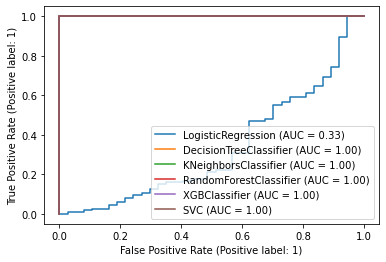

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve


### How well our model works on training Data

disp = plot_roc_curve(lr,X_train_ns,y_train_ns)

plot_roc_curve(dt,X_train_ns,y_train_ns, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(rf,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(xgb,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

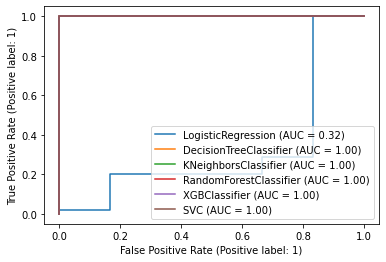

In [112]:
### How well our model works on Testing Data

disp = plot_roc_curve(lr,X_test,y_test)

plot_roc_curve(dt,X_test,y_test, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_test,y_test, ax= disp.ax_)

plot_roc_curve(rf,X_test,y_test, ax= disp.ax_)

plot_roc_curve(xgb,X_test,y_test, ax= disp.ax_)

plot_roc_curve(svc,X_test,y_test, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

# WE have again proved that we will use to Random Forest as its the best  ;-

- The Logistic Regression is only covering 33% of training data and only 32% of the test data, 
whereas Random Forest is covering 100% of training data as well as 100% of test data
- The scores in Logistic regression and Random Forest is very close like 2-3% is what we see , But we will do another test to compare in the next step again to confirm 
- th Random Forest will be an even better model with Hyperparameter tuning which will increase but the accuracy already @ 100% with more Area under the Curve Coverage

In [114]:
lr = LogisticRegression()

lr.fit(X_train_ns,y_train_ns)
lr.score(X_train_ns,y_train_ns)
pred_decision =lr.predict(X_test)

lrs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',lrs*100)

lrscore = cross_val_score(lr,X,y,cv=9)
lrc =lrscore.mean()
print('Cross Val Score :',lrc*100)
print(confusion_matrix(y_test,pred_test))

Accuracy Score : 100.0
Cross Val Score : 95.95959595959597
[[ 6  0]
 [ 0 45]]


In [115]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=9)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)
print(confusion_matrix(y_test,pred_test)) 

Accuracy Score : 100.0
Cross Val Score : 96.00351339481773
[[ 6  0]
 [ 0 45]]


We see that the accuracy score is actually the same and for the amount of data the Random forest is able to cover of the dataset we can assume that the Random Forest is the better model

# Hyper parameter Tuning

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

#Creating parameters to pass in RandomizedSearchCV

parameters = {'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split': [1, 2, 3, 4 ,5],
             'min_samples_leaf': [1, 3, 4, 5, 6, 7],
             'n_estimators' : [100,200,300,400,500]
             }

RCV = RandomizedSearchCV(estimator = rf,param_distributions = parameters, n_iter = 100, cv = 9, verbose=2, random_state=35, n_jobs = -1,scoring='accuracy')
RCV.fit(X_train_ns,y_train_ns) #fitting data into the model
RCV.best_params_ #printing the best parameters found by the RandomizedSearchCV

Fitting 9 folds for each of 100 candidates, totalling 900 fits


{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'criterion': 'gini'}

In [117]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators = 100,min_samples_split=4,min_samples_leaf=1,max_features='log2',criterion='gini')

rf.fit(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=9)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)
print(confusion_matrix(y_test,pred_test)) 

Accuracy Score : 100.0
Cross Val Score : 97.51866490996926
[[ 6  0]
 [ 0 45]]


In [118]:
RCV_pred=RCV.best_estimator_.predict(X_test) #predicting with the best parameters
accuracy_score(y_test,RCV_pred) #Checking Final Accuracy

1.0

From the above Hyperparameter Hyperparameter Tuning and final Model Building we see:-

- We have made a sight differnce in the cross val score , but the accuracy is already @ 100% so no change 
- But the cross val score has increased from 96% to 98 % approx which is the highest among all models  
- we can assume that the Random forest is at the peak of its performance and since we have no better score from any other model - we will create Pickle file 

In [119]:
import pickle
filename = 'Glass.pkl'
pickle.dump(RCV,open(filename,'wb'))

# Conclusion

In [121]:
loaded_model = pickle.load(open('Glass.pkl','rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

100.0


In [122]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],RCV_pred[:]],index=['Predicted','Orignal'])

In [123]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
Predicted,0,1,1,1,1,1,1,0,0,1,...,1,1,1,1,0,1,1,1,1,1
Orignal,0,1,1,1,1,1,1,0,0,1,...,1,1,1,1,0,1,1,1,1,1


## We have created a model and have created 2 rows with 51 columns which show the predicted as well as the orignal target .